The Following ML model will predict if an employee will get promoted or not


Importing the dependencies :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Data Collection :

In [ ]:
train_data = pd.read_csv("/content/train_data.csv")
test_data = pd.read_csv("/content/test_data.csv")

In [ ]:
print(train_data)

        employee_id         department     region         education gender  \
0            190767         Operations  region_27        Bachelor's      m   
1             10520  Sales & Marketing  region_31        Bachelor's      m   
2            103549         Technology  region_27  Master's & above      m   
3            108438  Sales & Marketing  region_10        Bachelor's      m   
4             51805        Procurement  region_22        Bachelor's      m   
...             ...                ...        ...               ...    ...   
155841        28027         Technology  region_24        Bachelor's      f   
155842       135763         Technology   region_5        Bachelor's      m   
155843        91998         Technology   region_5        Bachelor's      m   
155844        35632         Operations  region_30        Bachelor's      f   
155845       139474                 HR  region_22        Bachelor's      m   

       recruitment_channel  no_of_trainings  age  previous_year

In [ ]:
print(test_data)

       employee_id         department     region         education gender  \
0           140357  Sales & Marketing  region_31  Master's & above      m   
1           131638          Analytics  region_28        Bachelor's      m   
2           126519         Operations  region_11               NaN      m   
3            61240        Procurement  region_30        Bachelor's      f   
4           166530          Analytics   region_2        Bachelor's      m   
...            ...                ...        ...               ...    ...   
38957       178677  Sales & Marketing   region_2        Bachelor's      m   
38958        78279                R&D  region_23  Master's & above      m   
38959         7415         Operations   region_2        Bachelor's      f   
38960       114605         Technology  region_13        Bachelor's      m   
38961       190706  Sales & Marketing  region_24        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0 

Exploratory Data Analysis :

In [ ]:
#Reading the first 5 rows of the dataset
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,190767,Operations,region_27,Bachelor's,m,sourcing,1.0,47.0,1.0,6.0,1.0,0.0,55.0,0.0
1,10520,Sales & Marketing,region_31,Bachelor's,m,other,1.0,38.0,3.0,9.0,0.0,0.0,54.0,0.0
2,103549,Technology,region_27,Master's & above,m,sourcing,1.0,37.0,3.0,3.0,1.0,0.0,76.0,0.0
3,108438,Sales & Marketing,region_10,Bachelor's,m,sourcing,1.0,30.0,4.0,4.0,0.0,0.0,41.0,0.0
4,51805,Procurement,region_22,Bachelor's,m,sourcing,1.0,35.0,3.0,10.0,0.0,0.0,68.0,0.0


In [ ]:
# Reading the last 5 rows of the dataset
train_data.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
155841,28027,Technology,region_24,Bachelor's,f,sourcing,2,31,3.0,4,0,0,89,0
155842,135763,Technology,region_5,Bachelor's,m,sourcing,1,30,5.0,7,0,0,89,0
155843,91998,Technology,region_5,Bachelor's,m,other,1,36,3.0,6,0,0,84,0
155844,35632,Operations,region_30,Bachelor's,f,other,1,39,4.0,10,0,0,60,0
155845,139474,HR,region_22,Bachelor's,m,other,2,53,4.0,18,1,0,78,0


In [ ]:
#Finding the no. of rows and columns of the dataset
train_data.shape

(155846, 14)

In [ ]:
#checking for missing values
train_data.isnull().sum()

employee_id                 0
department                  0
region                      0
education                5330
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating    13355
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted                 0
dtype: int64

We can see that there are few missing vales in the dataset which has to be covered upon


<Axes: >

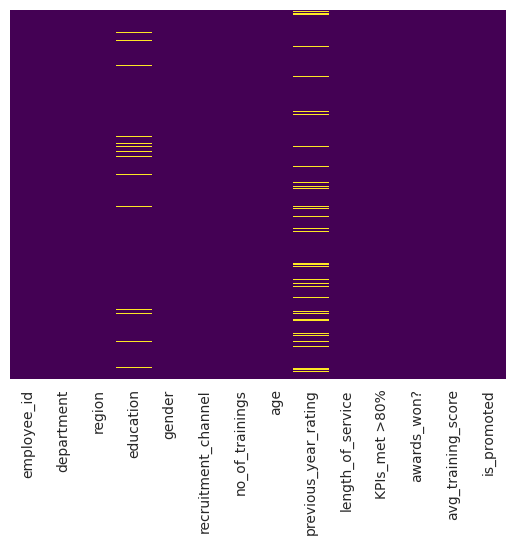

In [ ]:
#creating a seaborn heatmap to visualize where we are missing data
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

From the above heatmap, "eduation" and "previous_year_rating" columns have missing values almost equally in number and it is spread out all through the dataset


Data Visualization :

<Axes: xlabel='is_promoted', ylabel='count'>

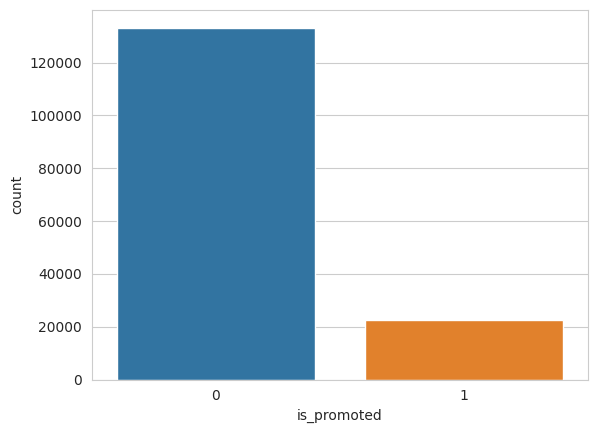

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',data=train_data)

<Axes: xlabel='is_promoted', ylabel='count'>

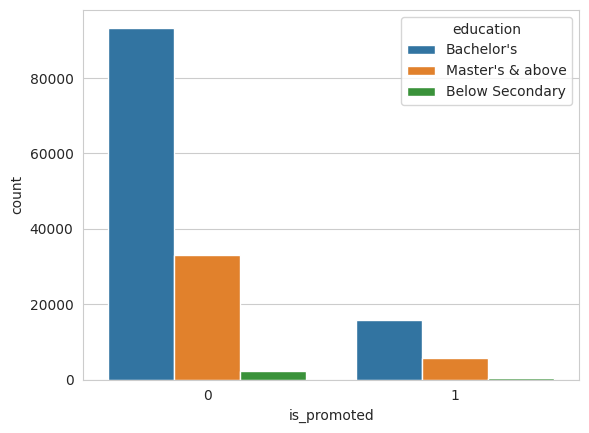

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='education',data=train_data)

<Axes: xlabel='is_promoted', ylabel='count'>

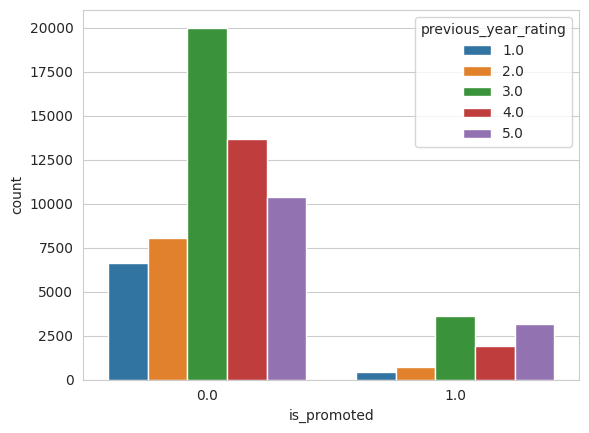

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='is_promoted',hue='previous_year_rating',data=train_data)

<Axes: xlabel='education', ylabel='count'>

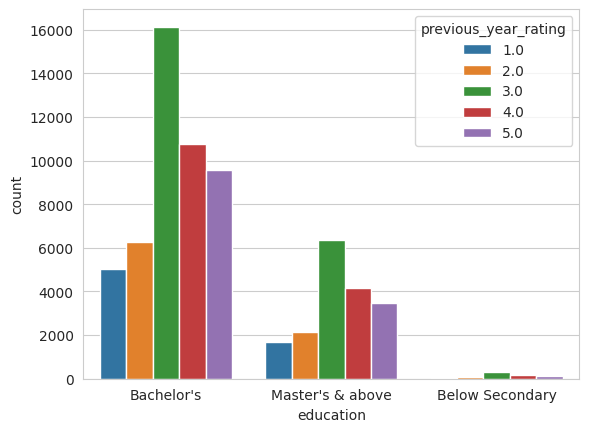

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='education',hue='previous_year_rating',data=train_data)

<Axes: xlabel='age', ylabel='avg_training_score'>

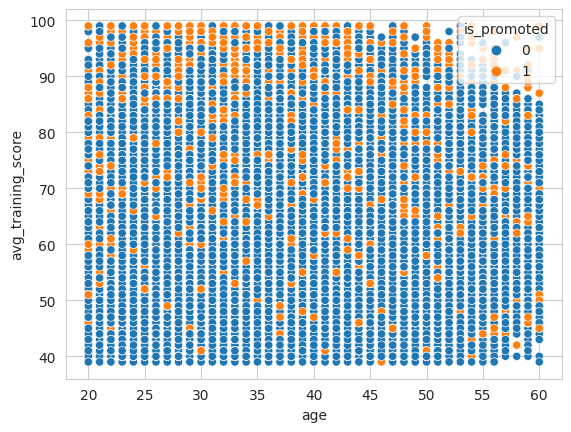

In [ ]:
sns.scatterplot(x='age',y='avg_training_score',hue='is_promoted',data=train_data)

From the above plot its clear that training score of the individual has more impact on the target varibale than age of the person

Handling missing values :

We will be replacing null values of the 'education' and 'previous_year_rating' column with the value or category that has most occurences

In [ ]:
train_data["education"].fillna("Bachelor's", inplace=True)
train_data["previous_year_rating"].fillna("3.0", inplace=True)
test_data["education"].fillna("Bachelor's", inplace=True)
test_data["previous_year_rating"].fillna("3.0", inplace=True)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,190767,Operations,region_27,Bachelor's,m,sourcing,1,47,1.0,6,1,0,55,0
1,10520,Sales & Marketing,region_31,Bachelor's,m,other,1,38,3.0,9,0,0,54,0
2,103549,Technology,region_27,Master's & above,m,sourcing,1,37,3.0,3,1,0,76,0
3,108438,Sales & Marketing,region_10,Bachelor's,m,sourcing,1,30,4.0,4,0,0,41,0
4,51805,Procurement,region_22,Bachelor's,m,sourcing,1,35,3.0,10,0,0,68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155841,28027,Technology,region_24,Bachelor's,f,sourcing,2,31,3.0,4,0,0,89,0
155842,135763,Technology,region_5,Bachelor's,m,sourcing,1,30,5.0,7,0,0,89,0
155843,91998,Technology,region_5,Bachelor's,m,other,1,36,3.0,6,0,0,84,0
155844,35632,Operations,region_30,Bachelor's,f,other,1,39,4.0,10,0,0,60,0


In [ ]:
train_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
test_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

Now, lets convert all the categorical values into numerical values using one hot encoding for the model to comprehend

In [ ]:
cat_features = ['education']
encoded_train_data = pd.get_dummies(train_data, columns=cat_features)
encoded_test_data = pd.get_dummies(test_data, columns=cat_features)
# replacing "m" - 1 and "mn" - 0
encoded_train_data['gender'].replace(['m','f'],[1,0],inplace=True)
encoded_test_data['gender'].replace(['m','f'],[1,0],inplace=True)

In [ ]:
encoded_train_data

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above
0,190767,Operations,region_27,1,sourcing,1,47,1.0,6,1,0,55,0,1,0,0
1,10520,Sales & Marketing,region_31,1,other,1,38,3.0,9,0,0,54,0,1,0,0
2,103549,Technology,region_27,1,sourcing,1,37,3.0,3,1,0,76,0,0,0,1
3,108438,Sales & Marketing,region_10,1,sourcing,1,30,4.0,4,0,0,41,0,1,0,0
4,51805,Procurement,region_22,1,sourcing,1,35,3.0,10,0,0,68,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155841,28027,Technology,region_24,0,sourcing,2,31,3.0,4,0,0,89,0,1,0,0
155842,135763,Technology,region_5,1,sourcing,1,30,5.0,7,0,0,89,0,1,0,0
155843,91998,Technology,region_5,1,other,1,36,3.0,6,0,0,84,0,1,0,0
155844,35632,Operations,region_30,0,other,1,39,4.0,10,0,0,60,0,1,0,0


In [ ]:
encoded_test_data

,employee_id,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_Bachelor's,education_Below Secondary,education_Master's & above
0,140357,Sales & Marketing,region_31,1,other,2,46,4.0,2,1,0,43,0,0,1
1,131638,Analytics,region_28,1,other,1,37,5.0,10,1,0,76,1,0,0
2,126519,Operations,region_11,1,other,1,40,5.0,9,1,0,58,1,0,0
3,61240,Procurement,region_30,0,other,1,33,5.0,3,1,1,69,1,0,0
4,166530,Analytics,region_2,1,other,2,30,4.0,3,1,0,86,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38957,178677,Sales & Marketing,region_2,1,sourcing,1,23,3.0,4,0,0,43,1,0,0
38958,78279,R&D,region_23,1,sourcing,1,38,3.0,3,0,0,60,0,0,1
38959,7415,Operations,region_2,0,sourcing,2,31,3.0,3,0,0,59,1,0,0
38960,114605,Technology,region_13,1,other,2,37,2.0,9,1,0,62,1,0,0


Finding the correlation between features and how does each one affect the target variable using a heat map

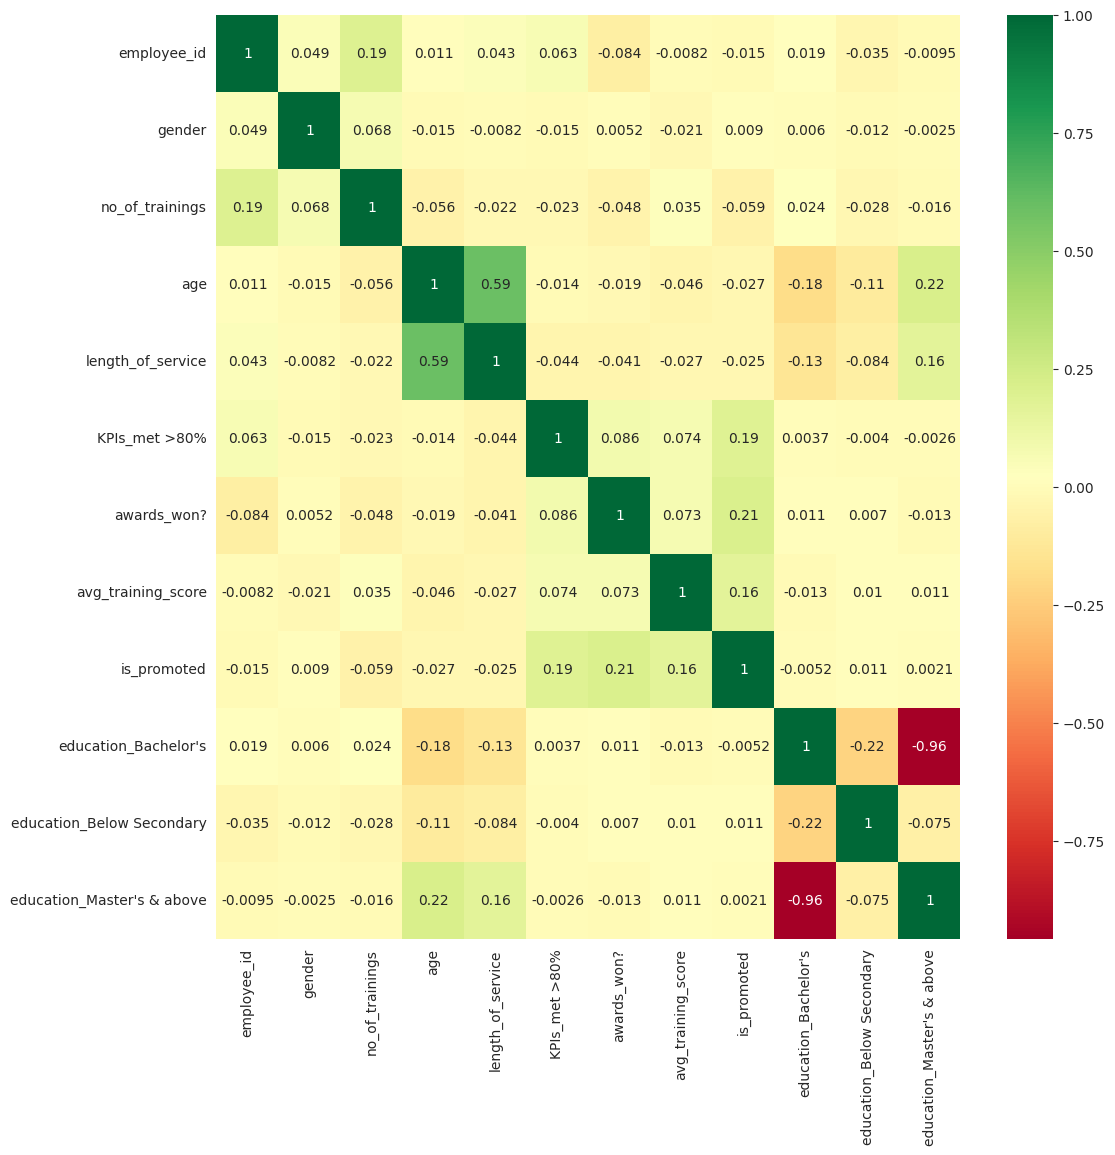

In [ ]:
corrmat = encoded_train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#heat map
s = sns.heatmap(encoded_train_data[top_corr_features].corr(),annot = True,cmap = "RdYlGn")

From the above heat map we can conclude that features 'KPIs_met >80%', 	'awards_won?', 'avg_training_score' have some correlation with the target variable column compared to other features

Statistical Data Analysis :

In [ ]:
#Distribution of the target variable:
encoded_train_data['is_promoted'].value_counts()

0    133226
1     22620
Name: is_promoted, dtype: int64

In [ ]:
encoded_train_data.groupby('is_promoted').mean()

,employee_id,gender,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_Bachelor's,education_Below Secondary,education_Master's & above
is_promoted,,,,,,,,,,,
0,97805.118543,0.738527,1.322700,34.710770,5.925683,0.370536,0.011582,62.718531,0.736088,0.016311,0.247602
1,95423.485897,0.749779,1.231742,34.133731,5.638727,0.634041,0.104907,68.857118,0.729576,0.020203,0.250221


In [ ]:
#removing unwanted features
X = encoded_train_data.drop(columns=['employee_id','department','region','recruitment_channel','is_promoted'])
Y = encoded_train_data['is_promoted']
X_test = encoded_test_data.drop(columns=['employee_id','department','region','recruitment_channel'])


In [ ]:
X.tail()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_Bachelor's,education_Below Secondary,education_Master's & above
155841,0,2,31,3.0,4,0,0,89,1,0,0
155842,1,1,30,5.0,7,0,0,89,1,0,0
155843,1,1,36,3.0,6,0,0,84,1,0,0
155844,0,1,39,4.0,10,0,0,60,1,0,0
155845,1,2,53,4.0,18,1,0,78,1,0,0


In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

Data Modelling :

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X,Y)

LogisticRegression()

In [ ]:
prediction_train = model.predict(X)
accuracy_train = accuracy_score(Y,prediction_train)

In [ ]:
print("Accuracy score on training data :",accuracy_train)


Accuracy score on training data : 0.8615107221231215


Confusion Matrix

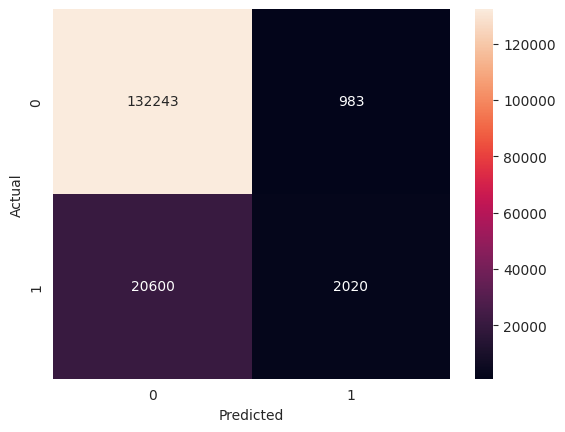

In [ ]:
con_mat = confusion_matrix(Y,prediction_train)

sns.heatmap(con_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
test_prediction = model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
submission = pd.DataFrame({'employee_id' : test_data.employee_id,'is_promoted' : test_prediction})

In [ ]:
submission.to_csv("submission6.csv",index=False)